# Tasca M5 T01

**Exercicis d'Hipotesis Testing.**

## Exercici 1
**Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/Lligues europees UEFA.csv',sep=';', encoding='latin1')

df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


**Diccionario de Terminos:**

- **'Rk'**: Ranking o posición del club en la tabla de clasificación.
- **'Squad'**: Nombre del club o equipo.
- **'Country'**: País al que pertenece el club.
- **'LgRk'**: Ranking o posición del club en su liga respectiva.
- **'MP'**: Partidos jugados.
- **'W'**: Partidos ganados.
- **'D'**: Partidos empatados.
- **'L'**: Partidos perdidos.
- **'GF'**: Goles a favor.
- **'GA'**: Goles en contra.
- **'GD'**: Diferencia de goles (GF - GA).
- **'Pts'**: Puntos obtenidos en la liga.
- **'Pts/G'**: Puntos por partido (Pts divididos por MP).
- **'xG'**: Expected Goals (goles esperados, una métrica estadística que evalúa la calidad de las oportunidades de gol creadas por el equipo).
- **'xGA'**: Expected Goals Against (goles esperados en contra).
- **'xGD'**: Expected Goal Difference (diferencia de goles esperada, xG - xGA).
- **'xGD/90'**: Expected Goal Difference por partido.
- **'Last 5'**: Rendimiento en los últimos 5 partidos.
- **'Attendance'**: Asistencia promedio de espectadores a los partidos en el estadio.
- **'Top Team Scorer'**: Nombre del máximo goleador del equipo.
- **'Goalkeeper'**: Nombre del portero titular del equipo.

Comprobamos que no existen 'nulls', 'nan' ni duplicados en el dataframe.

In [2]:
df.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [3]:
df.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [4]:
df.duplicated().sum()

0

Debido a que el número de partidos jugados no es el mismo para todas las ligas, procederé a dividir las variables 'GF', 'GA', 'xG' y 'xGA' por el número de partidos 'MP', de modo que tendremos unos datos mas precisos.
En el caso de 'GD' será recalculado para que siga siendo la diferencia de goles (pero ahora, por partidos)

In [5]:
df['GF'] = (df['GF'] / df ['MP']).round(2)
df['GA'] = (df['GA'] / df ['MP']).round(2)
df['xG'] = (df['xG'] / df ['MP']).round(2)
df['xGA'] = (df['xGA'] / df ['MP']).round(2)
df['GD'] = df ['GF'] - df['GA']

df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,2.59,0.65,...,90,2.43,2.33,0.72,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,2.47,0.67,...,86,2.39,2.35,0.92,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,2.16,0.84,...,85,2.30,1.97,1.24,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,2.85,1.09,...,77,2.26,2.59,1.09,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,2.30,0.97,...,83,2.24,1.94,1.03,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,1.30,2.41,...,28,0.76,1.12,1.85,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,0.92,1.86,...,26,0.70,0.96,1.91,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,0.89,2.03,...,23,0.62,1.02,1.73,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,0.62,2.14,...,22,0.59,0.89,1.98,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


A continuación hacemos un pequeño estudio estadístico de las variables numéricas.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,98.0,49.500000,28.434134,1.00,25.2500,49.500,73.7500,98.00
LgRk,98.0,10.316327,5.706926,1.00,5.2500,10.000,15.0000,20.00
MP,98.0,36.306122,1.152390,34.00,36.0000,37.000,37.0000,37.00
W,98.0,13.448980,5.747474,3.00,9.0000,13.000,17.0000,28.00
D,98.0,9.408163,2.903381,3.00,7.0000,9.000,11.0000,16.00
L,98.0,13.448980,5.123470,2.00,10.0000,13.000,17.0000,26.00
GF,98.0,1.403776,0.453310,0.62,1.0800,1.305,1.6725,2.85
GA,98.0,1.403367,0.378905,0.65,1.0900,1.390,1.6500,2.41
GD,98.0,0.000408,0.731121,-1.59,-0.5000,-0.030,0.4675,1.94
Pts,98.0,49.734694,16.166371,18.00,37.0000,46.000,61.7500,90.00


Para el primer ejercicio vamos a comprobar si los goles recibidos 'GA' por los equipos europeos sigue una distribución normal. El test elegido es Shapiro-Wilk puesto que es generalmente adecuada para una variedad de formas de distribuciones y no está limitada a un tamaño de muestra específico. El planteamiento de la hipótesis sería:
   - **Ho. Hipótesis Nula**: La muestra de los goles encajados sigue una distribución normal.
   - **H1. Hipótesis Alternativa**: La muestra de goles encajados no sigue una distribución normal.

In [7]:
from scipy.stats import shapiro
stat, p = shapiro(df['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.984, p=0.262
Probably Gaussian


Como se puede apreciar, el valor de 'p' es superior a alfa ('0.05'), lo cual conduce a la aceptación de la hipótesis nula. Con un nivel de confianza del 95%, podemos afirmar con certeza que la distribución de goles encajados sigue una distribución normal.

Una vez confirmado vamos a ver como se vería la distribución de densidad de probabilidad.

<Axes: xlabel='GA', ylabel='Density'>

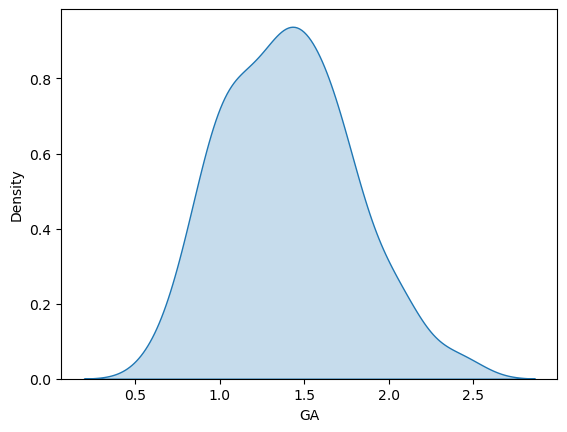

In [8]:
sns.kdeplot(df,x= 'GA', fill=True)

## Exercici 2
**Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.**

Mi objetivo esta ocasión es saber si existe correlación entre los goles encajados 'GA' y el números de puntos por partido 'Pts/G'.

Ya sabemos que 'GA' sigue una distribución normal, a continuación comprobaremos si 'Pts/G' también, con tal de decidir que test de hipotesis seguiremos.

A modo de curiosidad esta vez vamos a ver primero el gráfico de kernel para ver como estan distribuidos los datos.

<Axes: xlabel='Pts/G', ylabel='Density'>

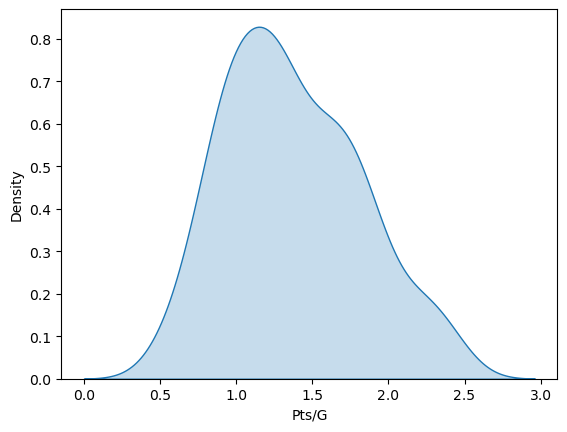

In [9]:
sns.kdeplot(df,x= 'Pts/G', fill=True)

A simple vista vemos que el gráfico tiene cierto parecido a una campana, aunque desplazada hacia la derecha. Seguramente esto sea debido a que la victoria valga 3 puntos. Parece claro que en caso de que la victoria valiese 2 puntos la gráfica sería mas simétrica. Veamos que nos dice el test.

Igual que en el ejercicio anterior, para comprobarlo analíticamente utilizaremos el test de Shapiro-Wilk y el planteamiento será el siguiente:

   - **Ho. Hipótesis Nula**: La muestra de los puntos por partido sigue una distribución normal.
   - **H1. Hipótesis Alternativa**: La muestra de los puntos por partido no sigue una distribución normal.

In [10]:
stat, p = shapiro(df['Pts/G'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.972, p=0.035
Probably not Gaussian


En este caso 'p' es menor que '0.05' de forma que rechazamos la hipótesis nula, y nos quedamos con la alternativa (los puntos por partido no sigue una distribución normal)

Esto nos obliga a desechar el test de correlación de Pearson, pues este supone que ambas muestras sigan una distribución normal, que no es el caso. Y nos decantamos por el coeficiente de correlacion de Spearman, especialmente útil cuando las relaciones entre las variables no son lineales y cuando los datos no cumplen con la asunción de normalidad.

La **hipótesis nula (H0)** en la prueba de Spearman es que no hay correlación entre las dos variables, mientras que la **hipótesis alternativa (H1)** sugiere que hay una correlación significativa.


In [11]:
from scipy.stats import spearmanr
stat, p = spearmanr(df['GA'], df ['Pts/G'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.813, p=0.000
Probably dependent


El valor de 'p' es casi nulo de manera que rechazamos rotundamente la Ho y podemos asegurar que existe una correlación significativa.

El valor estadístico es cercano a -1 lo cual quiere decir que existe una fuerte relación inversa entre ambos atributos. 

Intentemos plasmarlo en un gráfico.

<Axes: xlabel='GA', ylabel='Pts/G'>

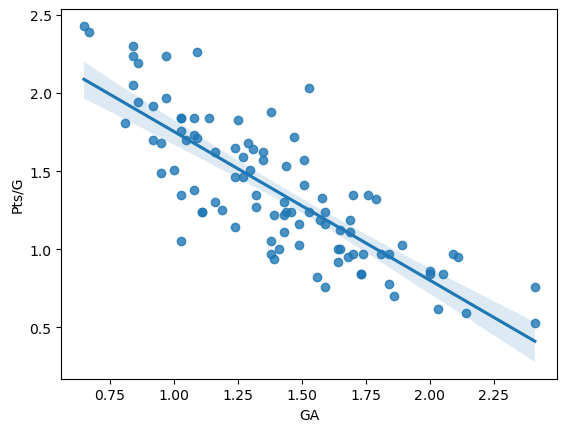

In [12]:
sns.regplot(x='GA', y='Pts/G', data=df)

## Exercici 3
**Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.**

En este apartado vamos a intentar dislucidar si hay una liga mas "fallona" que otra, es decir vamos a comparar si hay diferencias significativas entre las medias de goles esperados por partido 'xG' menos goles conseguidos por partido 'GF' en la liga española, francesa e inglesa.

Creamos una variable nueva que llamaremos 'fallo'.

In [13]:
df ['fallo'] = df ['xG'] - df ['GF']
fallo_esp = df[df['Country'] == 'ESP']['fallo']
fallo_fra = df[df['Country'] == 'FRA']['fallo']
fallo_ing = df[df['Country'] == 'ENG']['fallo']

Y a continuación haremos para las muestras de cada pais el test de Shapiro-Wilk con tal de saber si tienen una distribución normal, en este caso con mas razón elegimos este test pues son muestras menores de 30 elementos. El planteamiento será el mismo que anteriormente: 
La **hipótesis nula (H0)** será que la muestra sigue una distribución normal, mientras que la **hipótesis alternativa (H1)** sugiere que no hay una distribución normal.

In [14]:
statistic, p = shapiro(fallo_esp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=-0.813, p=0.418
Probably Gaussian


In [15]:
stat, p = shapiro(fallo_fra)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.969, p=0.737
Probably Gaussian


In [16]:
stat, p = shapiro(fallo_ing)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.954, p=0.425
Probably Gaussian


Como podemos comprobar las 'p' de todos los test es muy superior a '0.05', de forma que aceptamos en las tres ligas la hipótesis nula, es decir todas siguen una distribución normal.

El test mas utilizado para comparar si existen diferencias significativas entre más de dos muestras es el test ANOVA el cuál requiere de homogeneidad de las varianzas de las muestras. Por lo que a continuación realizaremos el test de Levene. La formulación de la hipótesis es:

-**Hipótesis nula (H0)**: Las varianzas son iguales en todos los grupos.

-**Hipótesis alternativa (H1)**: Al menos una de las varianzas es diferente.


In [17]:
from scipy.stats import levene
stat, p = levene(fallo_esp, fallo_fra, fallo_ing)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("No existen diferencias significativas entre las varianzas.")
else:
    print("Existe diferencias significativas entre las varianzas.")

stat=0.426, p=0.655
No existen diferencias significativas entre las varianzas.


El resultado de la 'p' es muy superior a la alfa por lo que aceptamos la hipótesis nula y concluimos que no existen diferencias significativas entre las varianzas.

Llegados aquí y habiendo demostrado que se cumplen las asunciones del test ANOVA, procedemos a ejecutarlo en busca de una respuesta. En este caso la **Ho. Hipótesis Nula** será que no existen diferencias significativas entre las medias de las muestras y la **H1. Hipotesis Alternativa** será que existen diferencias significativas entre las medias.

In [18]:
from scipy.stats import f_oneway
stat, p = f_oneway(fallo_esp, fallo_fra, fallo_ing)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.447, p=0.642
Probably the same distribution


Pues podemos concluir que no existen ligas mas "fallonas" que otras puesto que la 'p' es muy superior a '0,05' con lo cual aceptamos las hipotesis nula, es decir que las muestras no tienen diferencias significativas.

Acabemos la tarea ilustrando este último ejercicio con una gráfica superpuesta de las tres muestras.

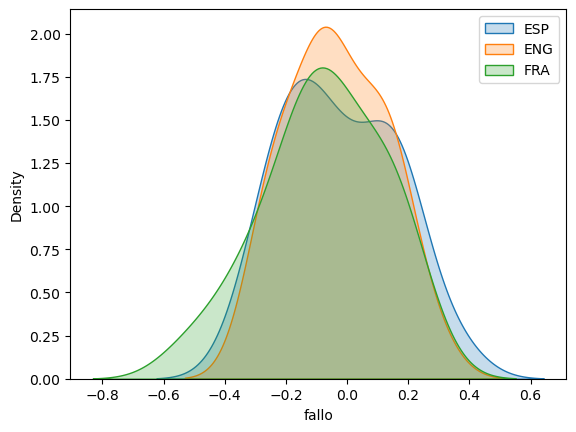

In [19]:
countries = {'ESP', 'FRA', 'ENG'}
for country in countries:
    data_country = df[df['Country'] == country]['fallo']
    sns.kdeplot(data=data_country, fill=True, label=country)
plt.legend()